In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-19 16:48:47--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-19 16:48:47 (46.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv', header=None).values
#print(data)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

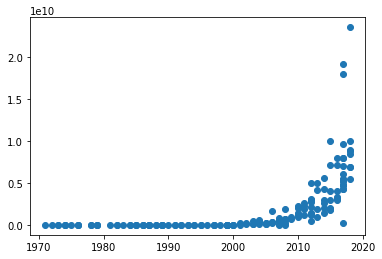

In [7]:
plt.scatter(X, y)

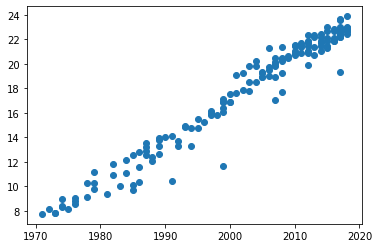

In [8]:
y = np.log(y)
plt.scatter(X, y)

In [0]:
X = X - X.mean()

In [0]:
#defining model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
              loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y,
              epochs=200,
              callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 485.9054 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 469.6481 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 258.1338 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 206.4991 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 142.1079 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 125.9286 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 88.4470 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 62.4735 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 48.4762 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 35.9418 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 2

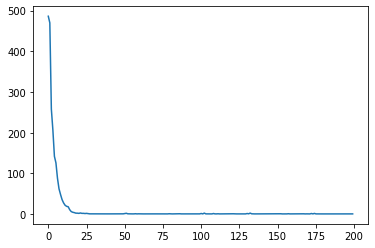

In [14]:
plt.plot(r.history['loss'], label='loss')

In [16]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33991063]], dtype=float32), array([17.750587], dtype=float32)]


In [17]:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.33991063


In [18]:
print("Time to double:", np.log(2)/a)

Time to double: 2.039204210464839


In [20]:
X = np.array(X).flatten()
y = np.array(y)

denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator

print(a, b)
print("Time to double:", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


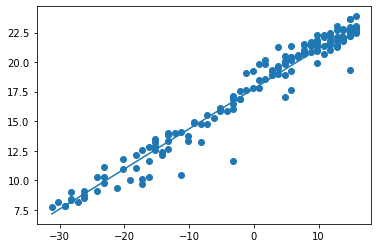

In [21]:
ypred = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, ypred)

In [22]:
#calculations to confirm manually

w, b = model.layers[0].get_weights()
X = X.reshape(-1, 1)

ypred_man = (X.dot(w) + b).flatten()

np.allclose(ypred, ypred_man)

True